In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,992 cases (7 day average) as of Fri 23 Apr, -33.6 since Thu 22 Apr
112 hospitalised (7 day average) as of Sun 25 Apr, -0.7 since Sat 24 Apr
15 died (7 day average) as of Fri 23 Apr, +0.3 since Thu 22 Apr


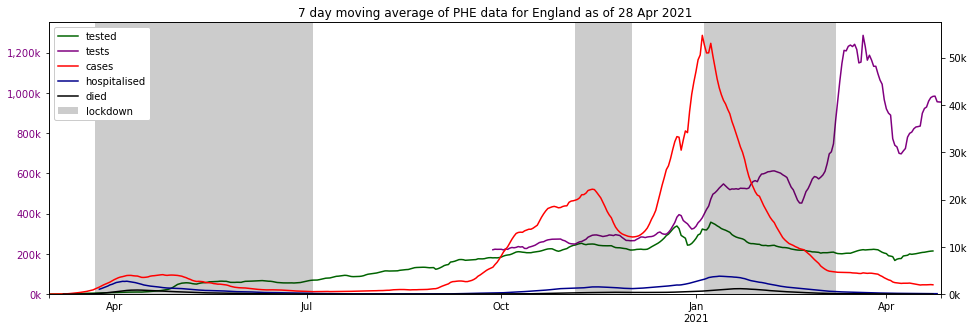

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

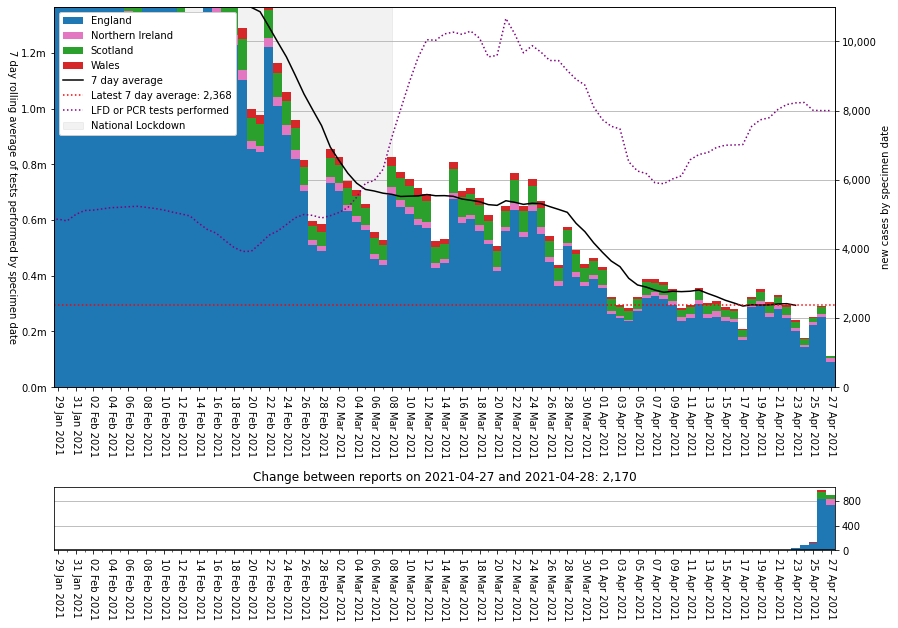

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

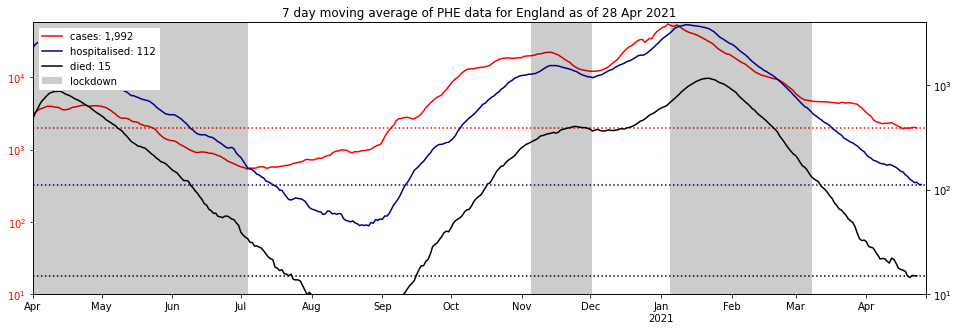

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

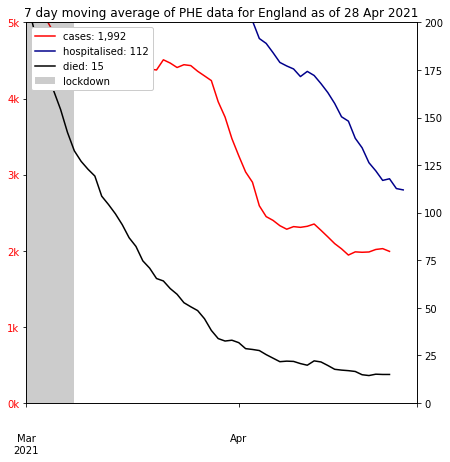

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,27 Apr 21,"+11,355,235","+28,441,846","+11,355,235","+313,616","+85,067","+313,616"
Northern Ireland,27 Apr 21,"+367,469","+927,656","+367,469","+11,066","+8,364","+11,066"
Scotland,27 Apr 21,"+1,142,947","+2,789,978","+1,142,947","+40,257","+7,816","+40,257"
Wales,27 Apr 21,"+715,425","+1,800,428","+715,425","+14,326","+15,081","+14,326"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,11355235.0,28441846.0,17086611.0,56286961,20.173829,30.356251,49.469921
1,Northern Ireland,N92000002,367469.0,927656.0,560187.0,1893667,19.405154,29.582128,51.012718
2,Scotland,S92000003,1142947.0,2789978.0,1647031.0,5463300,20.920451,30.147182,48.932367
3,Wales,W92000004,715425.0,1800428.0,1085003.0,3152879,22.691166,34.413087,42.895747


'partial: 33,959,908 (50.8%), full: 13,581,076'

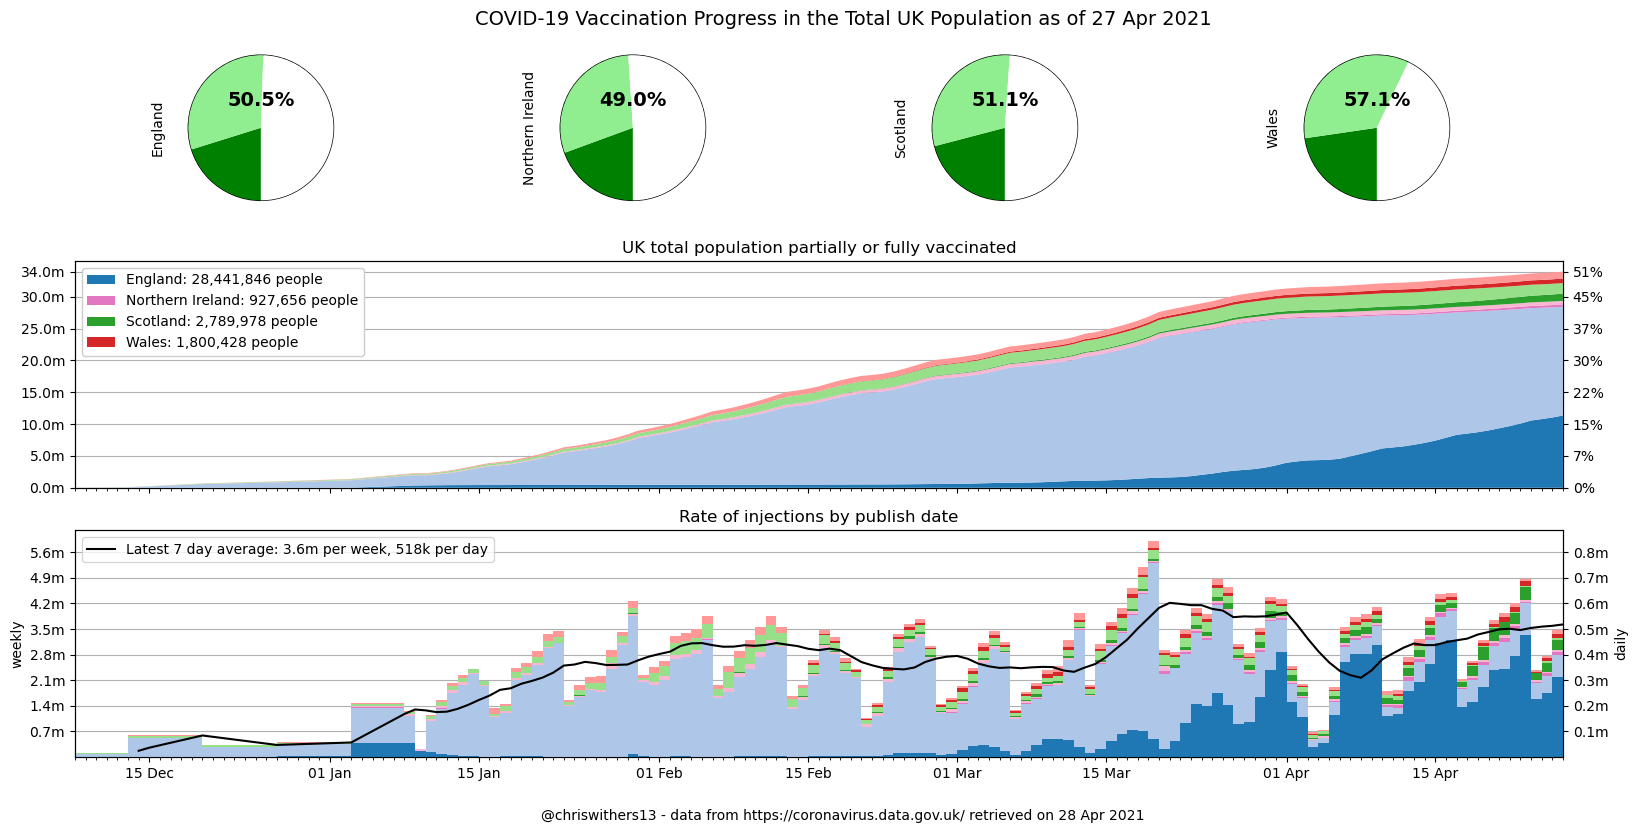

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

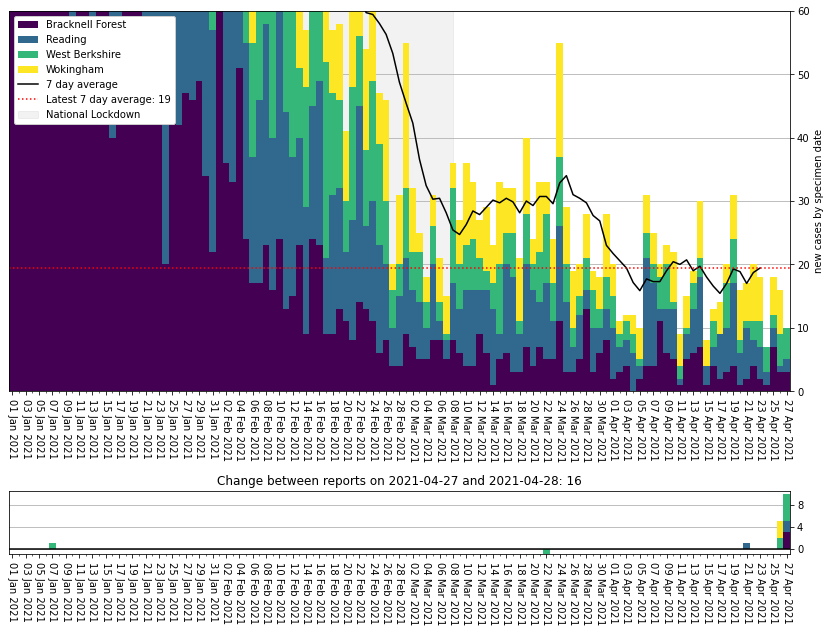

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

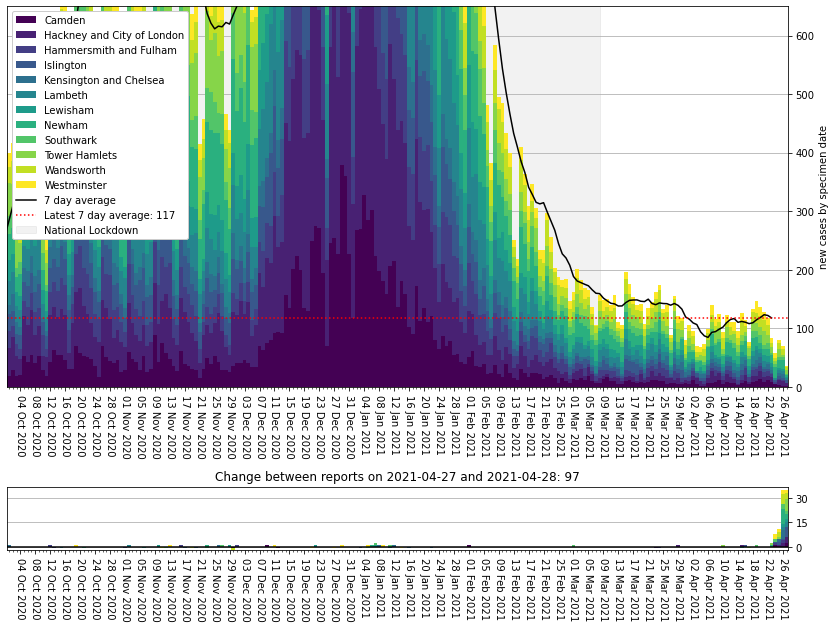

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000169,Selby,94.901788,86.0,2021-04-27
E07000120,Hyndburn,86.373900,70.0,2021-04-27
E06000013,North Lincolnshire,72.551250,125.0,2021-04-27
N09000009,Mid Ulster,69.347194,103.0,2021-04-27
N09000005,Derry City and Strabane,59.490759,90.0,2021-04-27
E08000034,Kirklees,58.664763,258.0,2021-04-27
E08000017,Doncaster,57.712655,180.0,2021-04-27
N09000006,Fermanagh and Omagh,53.664063,63.0,2021-04-27
E08000036,Wakefield,51.964905,181.0,2021-04-27


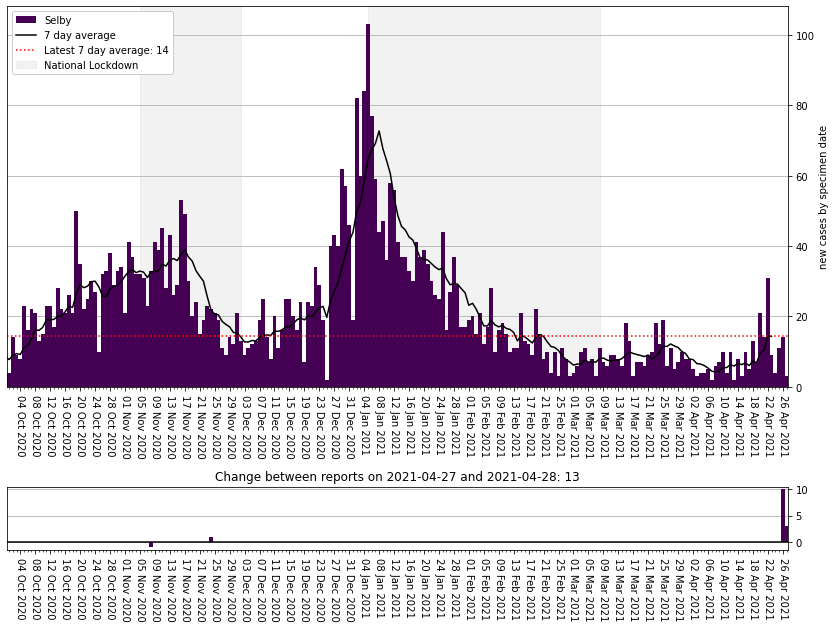

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,38.454798,305.0,2021-04-27
E08000034,Kirklees,58.664763,258.0,2021-04-27
E08000032,Bradford,43.536578,235.0,2021-04-27
E08000025,Birmingham,18.742074,214.0,2021-04-27
S12000049,Glasgow City,32.853172,208.0,2021-04-27
E08000019,Sheffield,35.051543,205.0,2021-04-27
E08000036,Wakefield,51.964905,181.0,2021-04-27
E08000017,Doncaster,57.712655,180.0,2021-04-27
E08000003,Manchester,29.844915,165.0,2021-04-27


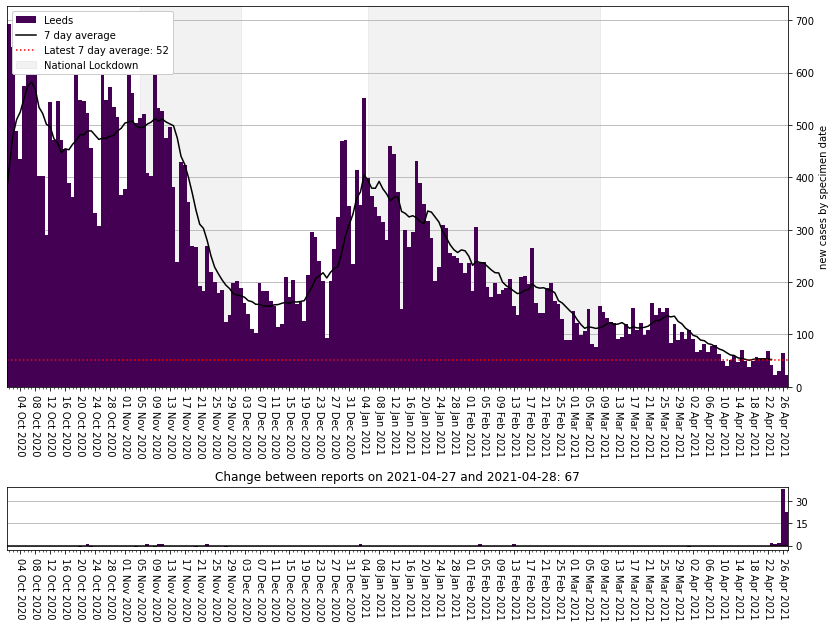

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

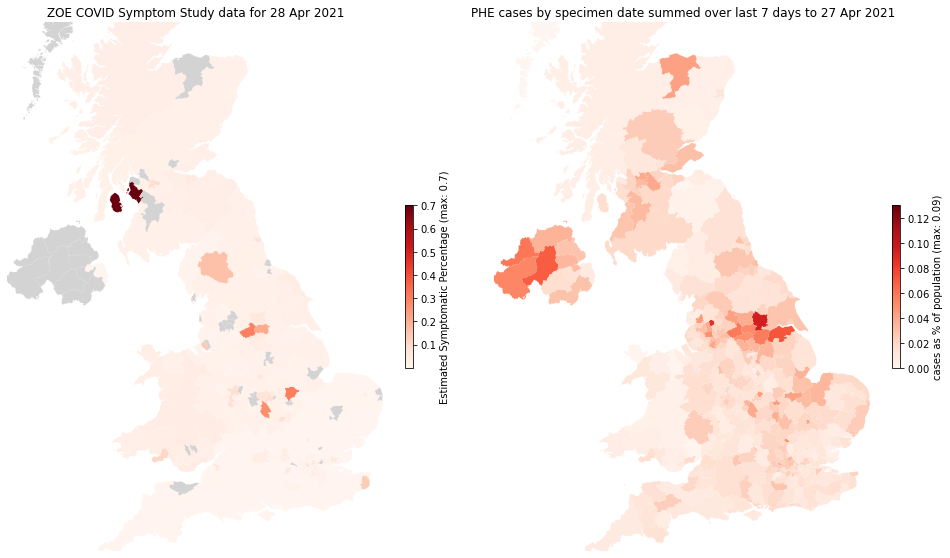

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...